In [12]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lib
import array
%matplotlib inline


audio = AudioSegment.from_file(
    "Example Music/happy.mp3", format='mp3')
audio_data = np.array(audio.get_array_of_samples(),dtype=np.int16).reshape(2,-1)

/tmp/ipykernel_110071/259536147.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  denoised_audio = audio._spawn(array.array(audio.array_type, denoised_data.reshape(-1).astype(np.int16)))


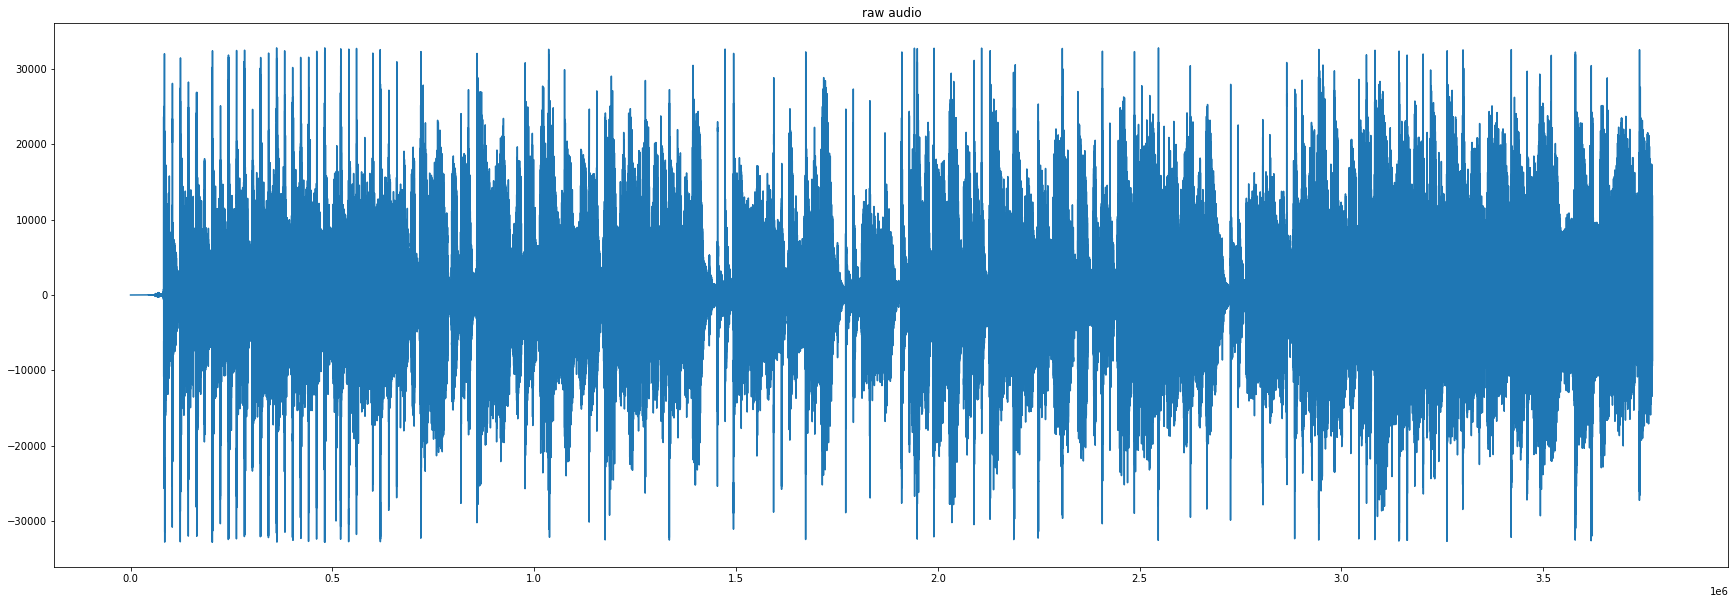

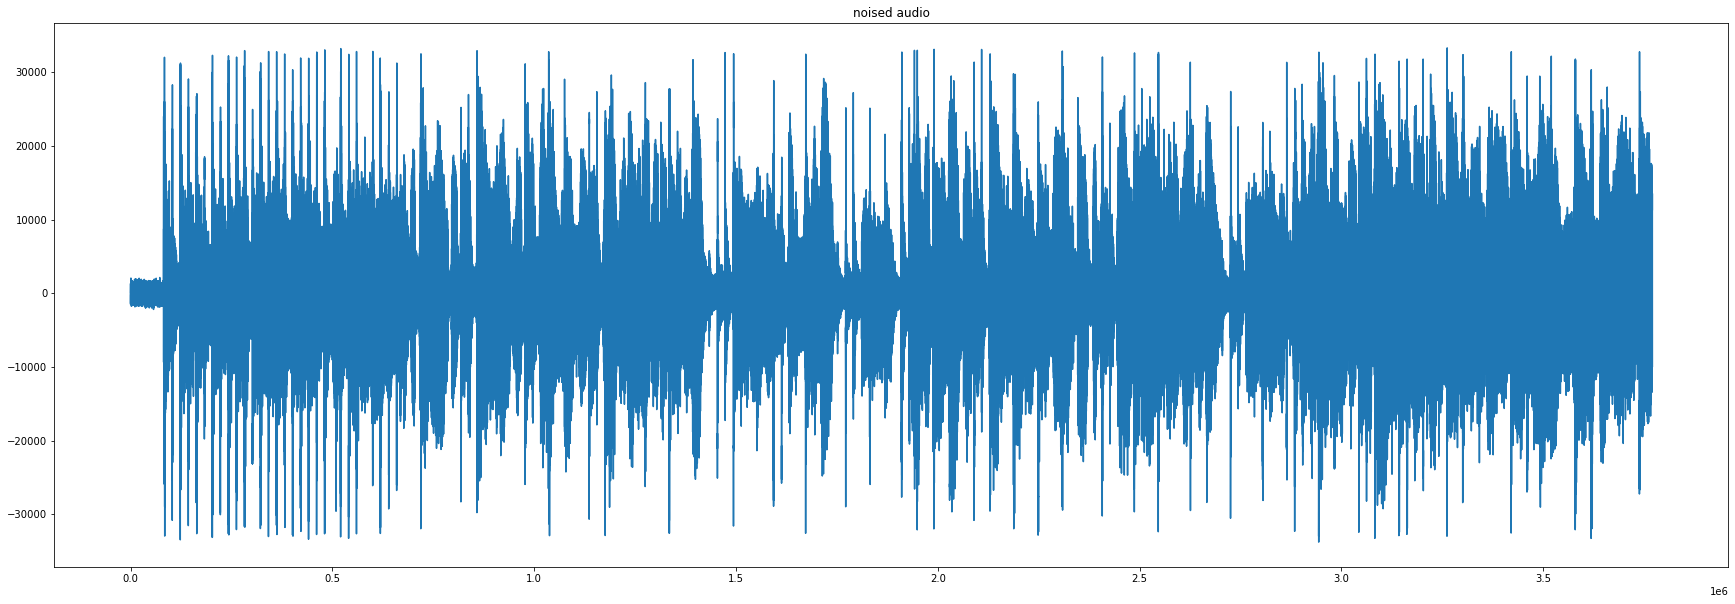

/home/nightingalecen/miniconda3/envs/AudioProcessing/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


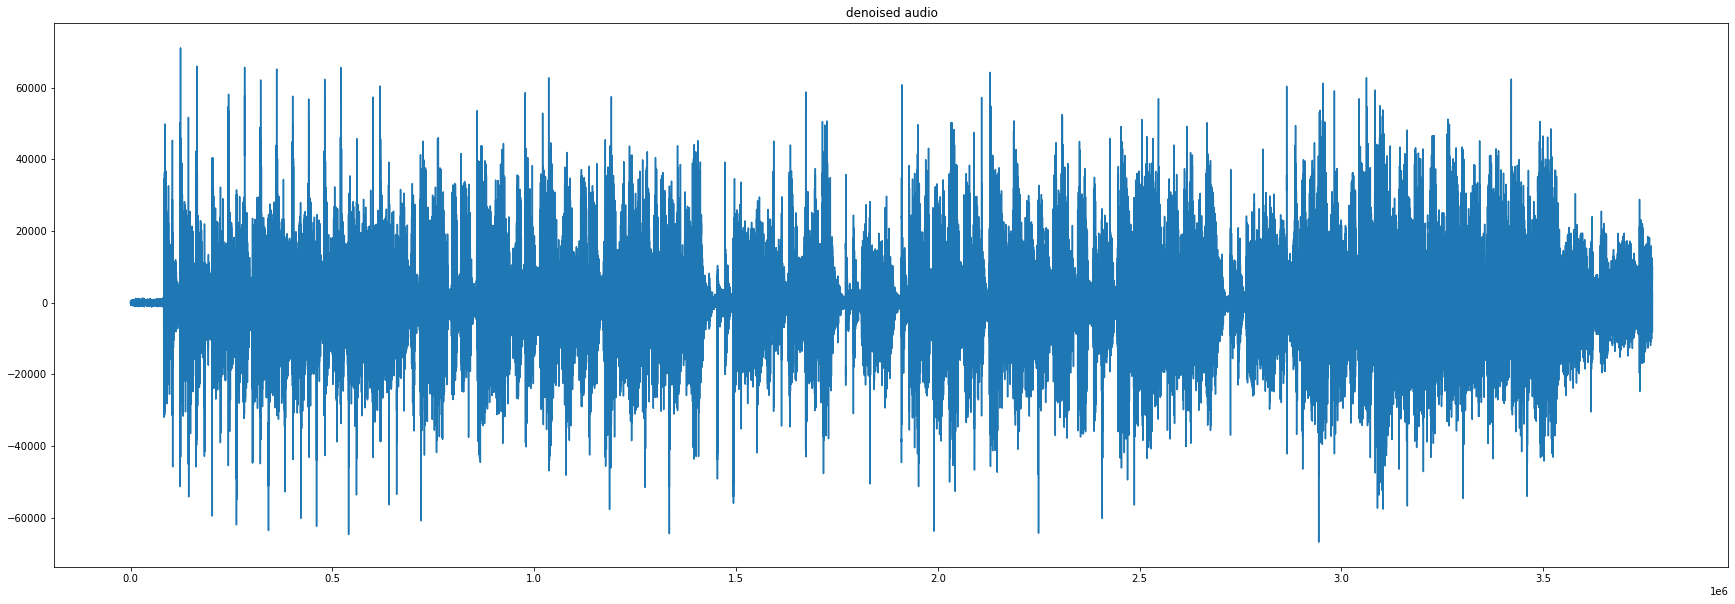

In [13]:
noised_data = lib.add_noise(audio_data, 0, 500)
denoised_data = lib.SS_denoise(noised_data, 44100, 5, 0.05)

noised_audio = audio._spawn(array.array(audio.array_type, noised_data.reshape(-1).astype(np.int16)))
noised_audio.export("noised_audio.mp3",format='mp3')
denoised_audio = audio._spawn(array.array(audio.array_type, denoised_data.reshape(-1).astype(np.int16)))
denoised_audio.export("denoised_audio.mp3",format='mp3')

plt.figure(figsize=(30,10))
plt.plot(np.arange(audio_data.shape[1]),audio_data[0])
plt.title("raw audio")
plt.show()
plt.figure(figsize=(30,10))
plt.plot(np.arange(audio_data.shape[1]),noised_data[0])
plt.title("noised audio")
plt.show()
plt.figure(figsize=(30,10))
plt.plot(np.arange(audio_data.shape[1]),denoised_data[0])
plt.title("denoised audio")
plt.show()
